In [1]:
import numpy as np 
import pandas as pd 
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt
import seaborn as sns

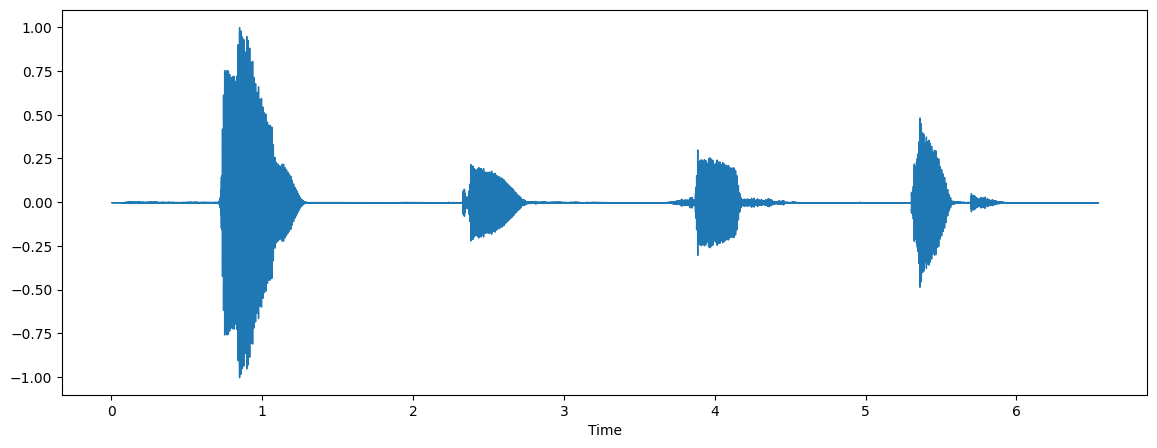

In [40]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
audio_path = r'C:\Users\Admin\Downloads\msg1.ogg'
y, sr = librosa.load(audio_path)

# Визначення граничного значення шуму
threshold = np.mean(np.abs(y)) * 1.5
# Визначення частин аудіо зі шумом
splits = np.where(np.abs(y) > threshold)[0]
splits_diff = np.diff(splits)
silence_threshold = sr * 0.5  # 0.5 секунди тиші як граничне значення
split_points = np.where(splits_diff > silence_threshold)[0] + 1
audio_chunks = np.split(y, split_points)

plt.figure(figsize=(14, 5))
librosa.display.waveshow(y, sr=sr)
plt.show()



In [123]:
import numpy as np
import librosa
import soundfile as sf

def split_audio_on_silence(audio, sr, threshold=0.01, min_sound_length=0.3, padding=0.45):
    segments = []
    silence_start = None
    sound_start = None
    min_sound_samples = int(min_sound_length * sr)
    padding_samples = int(padding * sr)
    f=int(padding_samples / 2)
    
    for i in range(len(audio)):
        if abs(audio[i]) < threshold:
            if sound_start is not None and i - sound_start >= min_sound_samples:
                start_segment = max(0, sound_start - padding_samples)
                end_segment = min(len(audio), i- padding_samples)
                segments.append(audio[start_segment:end_segment])
                sound_start = None
            if silence_start is None:
                silence_start = i
        else:
            if silence_start is not None:
                sound_start = i
                silence_start = None
    

    return segments

# Завантаження аудіофайлу
audio_path = r'C:\Users\Admin\Downloads\msg1.ogg'
audio, sr = librosa.load(audio_path, sr=None)

# Виклик функції для розділення аудіо
segments = split_audio_on_silence(audio, sr)

# Збереження сегментів у файли
for i, segment in enumerate(segments):
    output_path = f'segment_{i+1}.wav'
    sf.write(output_path, segment, sr)

print(f'Segment count: {len(segments)}')


Segment count: 4


In [42]:
import joblib

# Завантаження моделі
model = joblib.load(r'C:\Users\Admin\Downloads\МН\model.joblib')


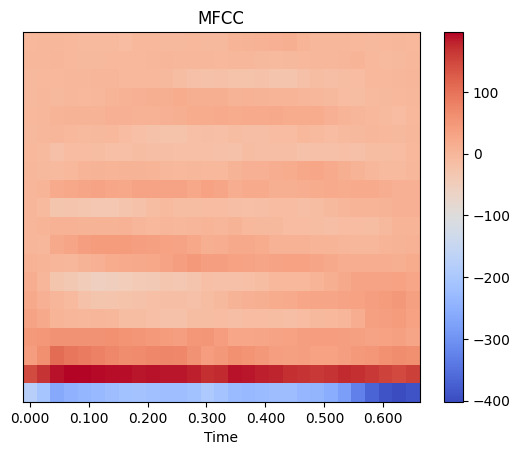

c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


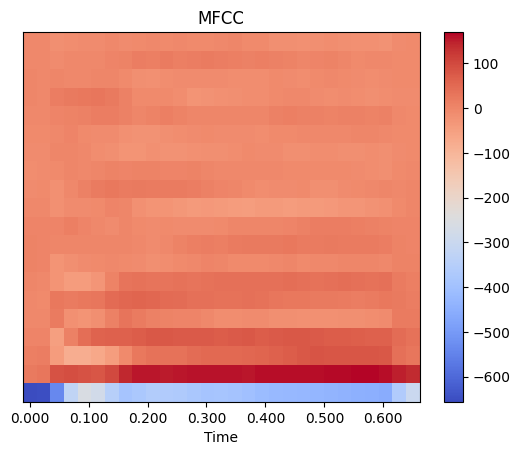

c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


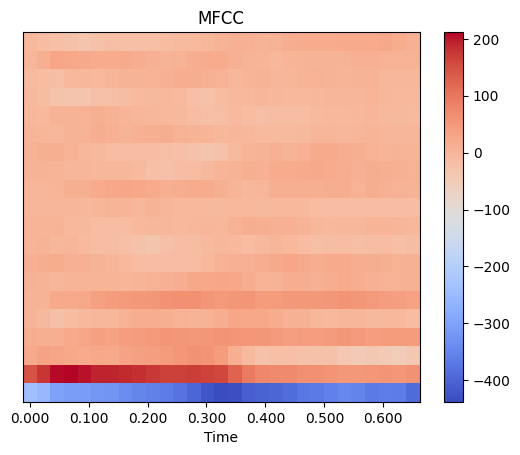

c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


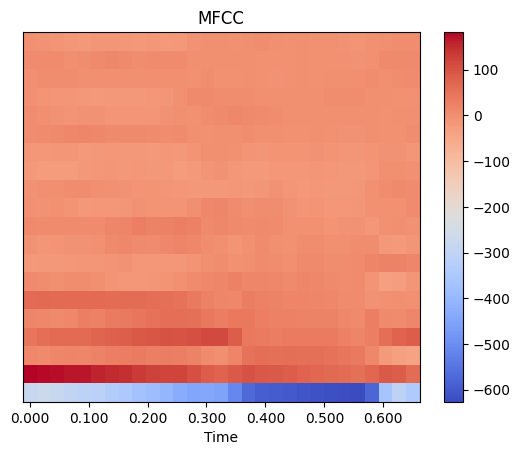

[array([1.]), array([1.]), array([9.]), array([0.])]


c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [124]:

def extract_mfcc_features(audio_segment, sr, n_mfcc=20):
    mfccs = librosa.feature.mfcc(y=audio_segment, sr=sr, n_mfcc=n_mfcc)
    mfccs_mean = np.mean(mfccs, axis=1)
    fig, ax = plt.subplots()
    img = librosa.display.specshow(mfccs, x_axis='time', ax=ax)
    fig.colorbar(img, ax=ax)
    ax.set(title='MFCC')
    plt.show()
    return mfccs_mean


# Екстракція ознак і передбачення для кожного сегмента
predictions = []
for segment in segments:
    
    feature = extract_mfcc_features(segment, sr)
    prediction = model.predict([feature])
    predictions.append(prediction)

print(predictions)

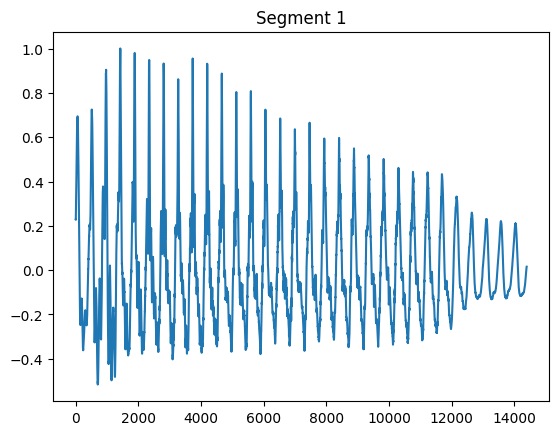

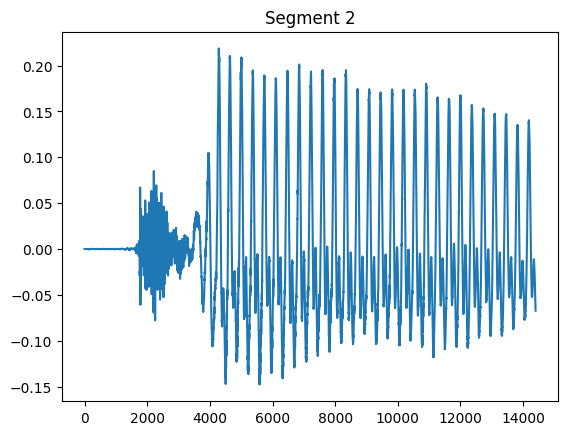

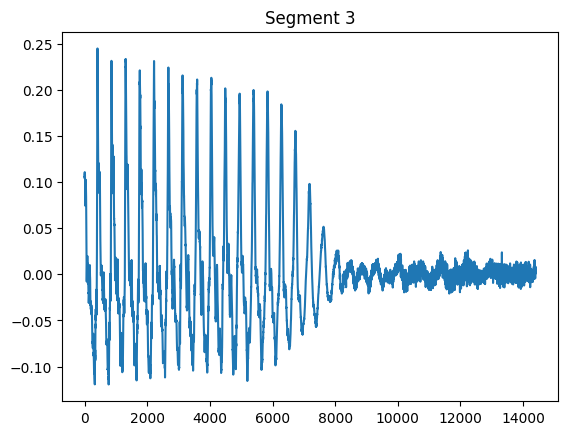

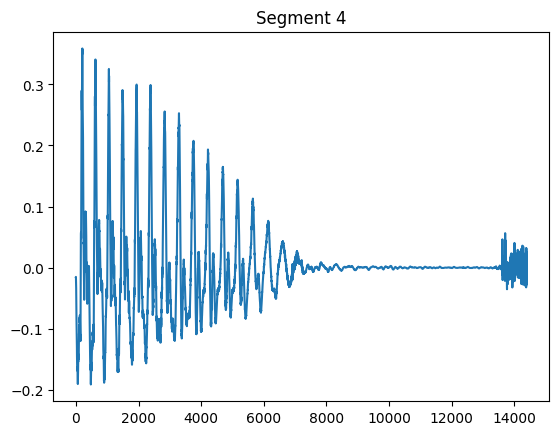

In [125]:
import matplotlib.pyplot as plt

for i, segment in enumerate(segments):
    plt.figure()
    plt.plot(segment)
    plt.title(f'Segment {i+1}')
    plt.show()